# Análisis Exploratorio y Modelado de Ventas Minoristas

**Introducción**

Este proyecto tiene como objetivo explorar, analizar y modelar un conjunto de datos reales del sector retail (ventas minoristas). El dataset proporciona un panorama detallado del proceso de ventas de una empresa, desde la realización de los pedidos hasta el envío, incluyendo datos sobre productos, clientes, descuentos, devoluciones y personal de ventas.

La base de datos también incluye una tabla calendario que nos permitirá realizar análisis temporales como evolución de ventas, comportamiento estacional y comparación por periodos (meses, trimestres, etc.).

***Retails Order Full Dataset (9,994 registros - 23 columnas):***

Detalla cada pedido individual con información clave como:

Fechas: Order Date, Ship Date

Producto: Product ID, Category, Sub-Category, Product Name

Ventas: Sales, Quantity, Discount, Profit

Cliente: Customer ID, Segment, Region, State, City

Otros: Returned, Retail Sales People, Ship Mode

***Calendar Table (1,826 registros - 12 columnas):***

Proporciona una dimensión de tiempo con campos como Date, Year, Quarter, Month, Week, Day Name, entre otros.

# Objetivos del Proyecto

Dividiremos este análisis en tres etapas principales:

**Análisis Exploratorio de Datos (EDA)**

Entender la estructura y calidad de los datos

Detectar patrones de ventas, clientes, productos y logística

Visualizar relaciones entre métricas como ventas, descuentos y devoluciones

Evaluar el comportamiento temporal y geográfico

In [14]:
import pandas as pd

# Ruta del archivo en tu Google Drive
file_path = "/content/drive/MyDrive/Databases/Ecommerce/Retail Supply Chain Sales Dataset/Retail-Supply-Chain-Sales-Dataset.xlsx"

# Cargar ambas hojas del Excel
df_orders = pd.read_excel(file_path, sheet_name="Retails Order Full Dataset")
df_calendar = pd.read_excel(file_path, sheet_name="Calendar Table")

# Verificar dimensiones
print("Dimensiones de los datasets:")
print("Retails Order Full Dataset:", df_orders.shape)
print("Calendar Table:", df_calendar.shape)

# Primeras filas de cada dataset
print("\nPrimeras filas del dataset de pedidos:")
display(df_orders.head())

print("\nPrimeras filas del dataset de calendario:")
display(df_calendar.head())

# Tipos de datos de la tabla de pedidos
print("\nTipos de datos en Retails Order Full Dataset:")
print(df_orders.dtypes)

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df_orders.isnull().sum())

Dimensiones de los datasets:
Retails Order Full Dataset: (9994, 23)
Calendar Table: (1826, 12)

Primeras filas del dataset de pedidos:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Retail Sales People,Product ID,Category,Sub-Category,Product Name,Returned,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,Not,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-08-11,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Cassandra Brandow,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",Not,731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-12-06,2016-12-06,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Anna Andreadi,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,Not,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,Not,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-11-10,2015-11-10,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Cassandra Brandow,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,Not,22.3680,2,0.20,2.5164



Primeras filas del dataset de calendario:


,Date,Year,Quarter,Quarter (Q),Quarter & Year,Month,Month Name,Month & Year,Week of Year,Week of Year (W),Day of Week,Day Name
0,2016-07-01,2016,3,Q3,2016 - Q3,7,Jul,Jul 2016,27,Week 27,5,Friday
1,2016-07-02,2016,3,Q3,2016 - Q3,7,Jul,Jul 2016,27,Week 27,6,Saturday
2,2016-07-03,2016,3,Q3,2016 - Q3,7,Jul,Jul 2016,27,Week 27,7,Sunday
3,2016-07-04,2016,3,Q3,2016 - Q3,7,Jul,Jul 2016,28,Week 28,1,Monday
4,2016-07-05,2016,3,Q3,2016 - Q3,7,Jul,Jul 2016,28,Week 28,2,Tuesday



Tipos de datos en Retails Order Full Dataset:
Row ID                          int64
Order ID                       object
Order Date             datetime64[ns]
Ship Date              datetime64[ns]
Ship Mode                      object
Customer ID                    object
Customer Name                  object
Segment                        object
Country                        object
City                           object
State                          object
Postal Code                     int64
Region                         object
Retail Sales People            object
Product ID                     object
Category                       object
Sub-Category                   object
Product Name                   object
Returned                       object
Sales                         float64
Quantity                        int64
Discount                      float64
Profit                        float64
dtype: object

Valores nulos por columna:
Row ID                 0
Order ID    

**Dimensiones:**

Pedidos: 9,994 filas × 23 columnas

Calendario: 1,826 filas × 12 columnas

**Tipos de datos:**

Fechas (Order Date, Ship Date) ya están correctamente en formato datetime64[ns]

Métricas como Sales, Discount, Profit, Quantity están en formato numérico

No hay valores nulos

Columna Returned es categórica ("Not" / probablemente "Yes" más adelante), lo cual será útil para clasificación.

# Análisis de ventas y beneficios

Estadísticas de métricas clave:
              Sales       Profit     Discount     Quantity
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001    28.656896     0.156203     3.789574
std      623.245101   234.260108     0.206452     2.225110
min        0.444000 -6599.978000     0.000000     1.000000
25%       17.280000     1.728750     0.000000     2.000000
50%       54.490000     8.666500     0.200000     3.000000
75%      209.940000    29.364000     0.200000     5.000000
max    22638.480000  8399.976000     0.800000    14.000000


<Figure size 1200x600 with 0 Axes>

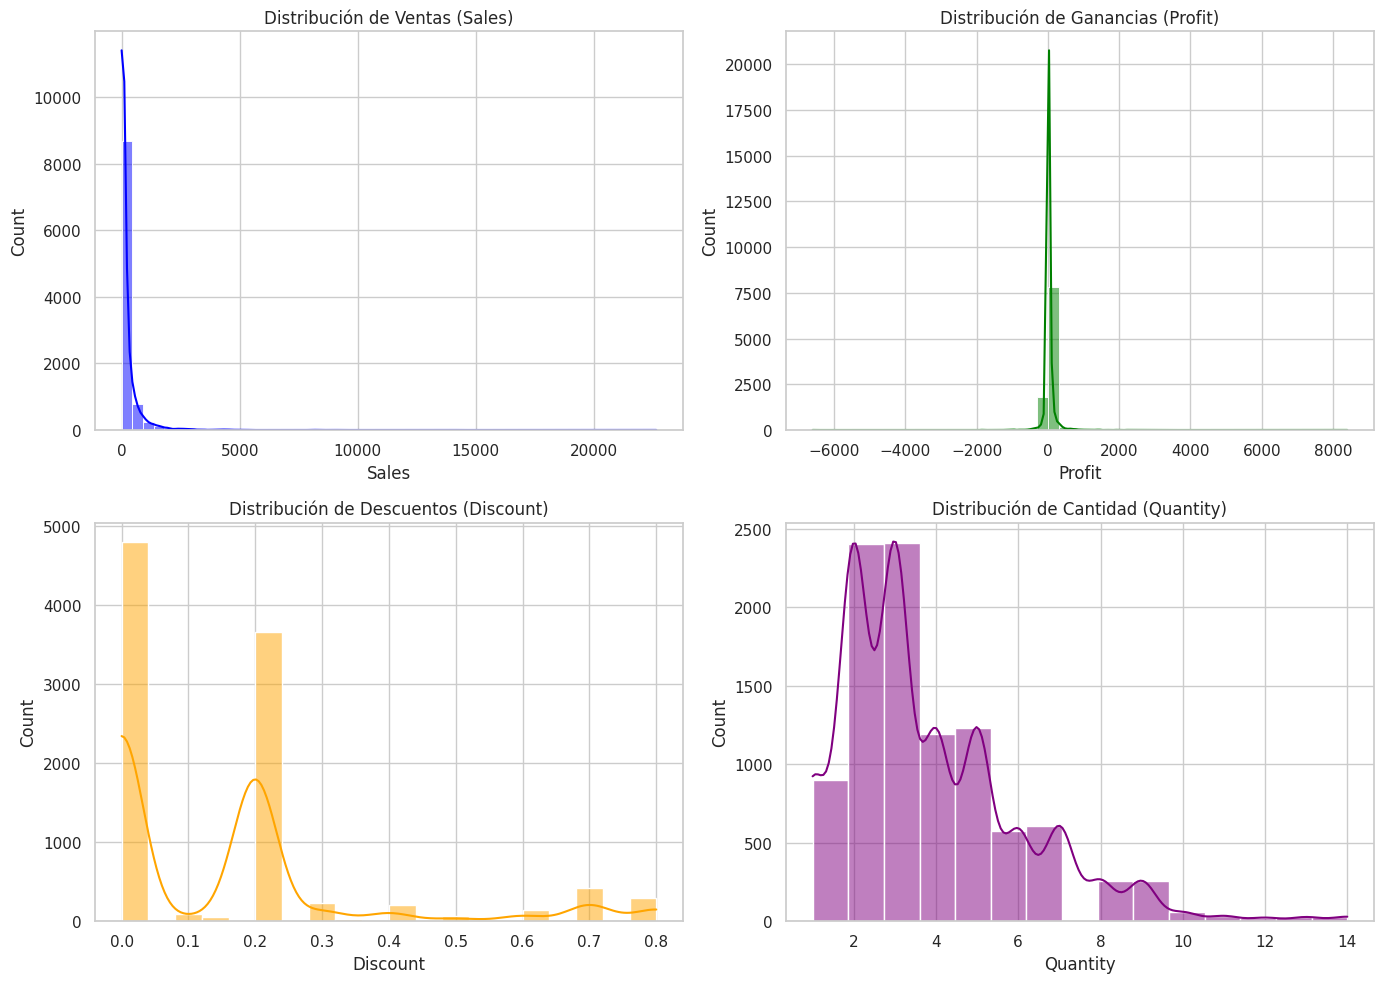

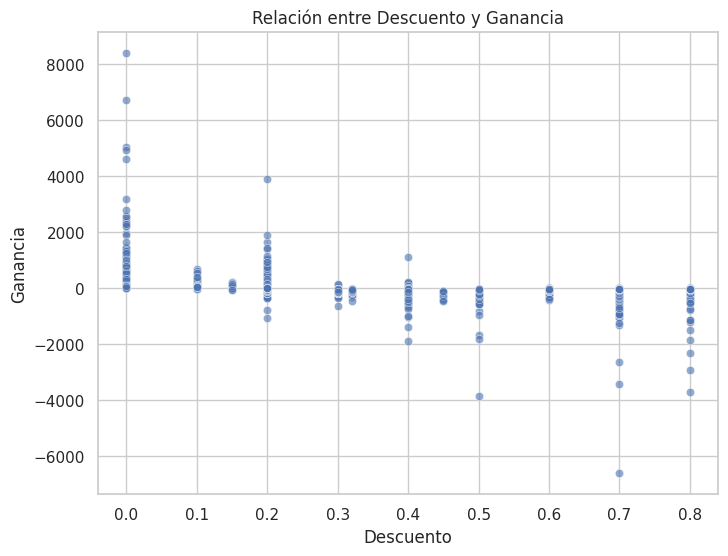

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Estadísticas descriptivas
print("Estadísticas de métricas clave:")
print(df_orders[["Sales", "Profit", "Discount", "Quantity"]].describe())

# Histogramas
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df_orders["Sales"], bins=50, kde=True, ax=axs[0, 0], color='blue')
axs[0, 0].set_title("Distribución de Ventas (Sales)")

sns.histplot(df_orders["Profit"], bins=50, kde=True, ax=axs[0, 1], color='green')
axs[0, 1].set_title("Distribución de Ganancias (Profit)")

sns.histplot(df_orders["Discount"], bins=20, kde=True, ax=axs[1, 0], color='orange')
axs[1, 0].set_title("Distribución de Descuentos (Discount)")

sns.histplot(df_orders["Quantity"], bins=15, kde=True, ax=axs[1, 1], color='purple')
axs[1, 1].set_title("Distribución de Cantidad (Quantity)")

plt.tight_layout()
plt.show()

# Relación entre Descuento y Ganancia
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Discount", y="Profit", data=df_orders, alpha=0.6)
plt.title("Relación entre Descuento y Ganancia")
plt.xlabel("Descuento")
plt.ylabel("Ganancia")
plt.show()

**Gráficos de Distribución**

**Ventas (Sales):**

1. Distribución fuertemente sesgada a la derecha.

2. La mayoría de las ventas son bajas (< 500), con algunos valores extremos muy altos (hasta 22,000).

3. Esto sugiere una mezcla de productos baratos y unos pocos muy costosos.

**Ganancia (Profit):**

1. También sesgada a la derecha, con una alta concentración cercana a cero.

2. Existen muchas órdenes con pérdidas significativas (negativas), probablemente asociadas a grandes descuentos.

**Descuento (Discount):**

1. Picos claros en 0%, 20% y 80%, lo que indica que hay políticas promocionales específicas.

2. El valor más común es 0%, seguido por 20%.

3. Pocos productos tienen descuentos mayores al 50%.

**Cantidad (Quantity):**

La mayoría de los pedidos son de 1 a 5 unidades, lo cual es típico en ventas minoristas.

**Relación Descuento vs Ganancia:**

1. Se observa claramente una tendencia: a mayor descuento, menor ganancia.

2. Algunos descuentos extremos (0.8) generan pérdidas considerables.

3. Esto indica que las promociones deben ser controladas cuidadosamente.

**Conclusiones:**

La empresa depende de muchas ventas pequeñas y algunas pocas grandes.

Hay un segmento no rentable: ventas con descuento alto y pérdida.

# Análisis de la Evolución Mensual de Ventas y Ganancias

/tmp/ipython-input-5-2420314974.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ventas_mensuales["Fecha"] = pd.to_datetime(ventas_mensuales["Month & Year"]) + MonthEnd(1)
/tmp/ipython-input-5-2420314974.py:28: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


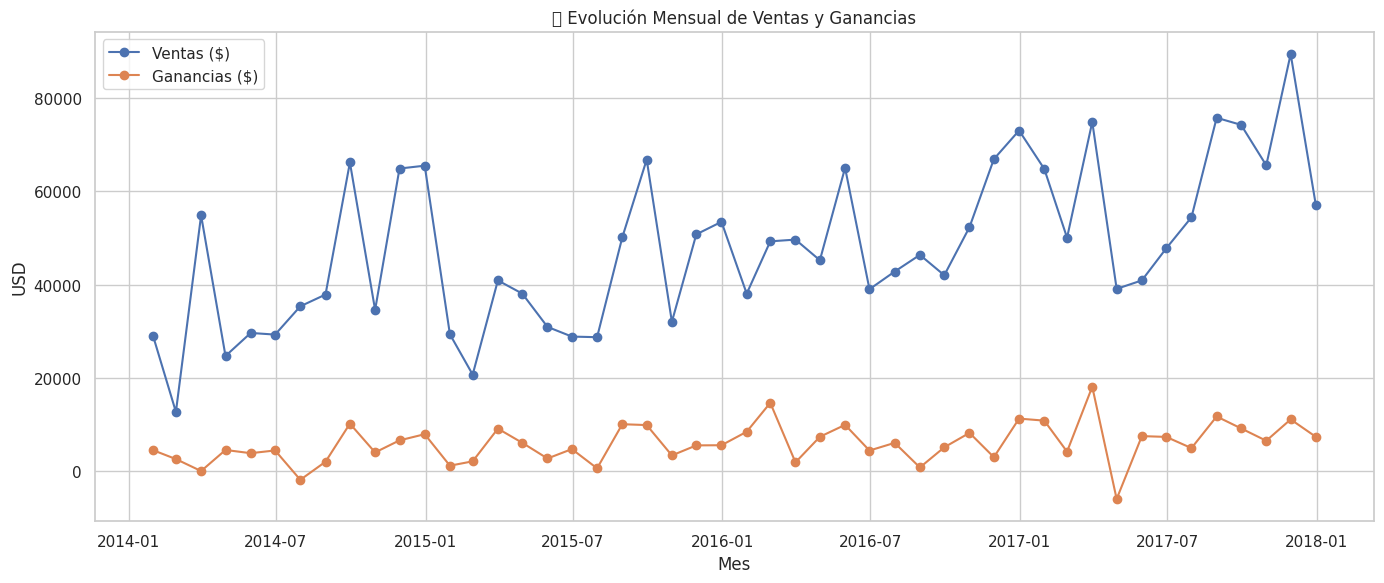

In [5]:
# Asegurar que las fechas están en formato datetime
df_orders["Order Date"] = pd.to_datetime(df_orders["Order Date"])

# Renombrar columna "Date" del calendario para facilitar merge
df_calendar = df_calendar.rename(columns={"Date": "Order Date"})

# Hacemos el merge con la tabla calendario usando "Order Date"
df_orders_time = pd.merge(df_orders, df_calendar, on="Order Date", how="left")

# Agrupar por mes y año para analizar evolución de ventas y ganancias
ventas_mensuales = df_orders_time.groupby("Month & Year")[["Sales", "Profit"]].sum().reset_index()

# Ordenar por fecha real
from pandas.tseries.offsets import MonthEnd
ventas_mensuales["Fecha"] = pd.to_datetime(ventas_mensuales["Month & Year"]) + MonthEnd(1)
ventas_mensuales = ventas_mensuales.sort_values("Fecha")

# Gráfico de evolución
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.plot(ventas_mensuales["Fecha"], ventas_mensuales["Sales"], marker='o', label="Ventas ($)")
plt.plot(ventas_mensuales["Fecha"], ventas_mensuales["Profit"], marker='o', label="Ganancias ($)")
plt.title("📈 Evolución Mensual de Ventas y Ganancias")
plt.xlabel("Mes")
plt.ylabel("USD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Tendencias generales:**

Ventas muestran una tendencia creciente a lo largo del tiempo, especialmente desde mediados de 2016 hasta finales de 2017.

Ganancias también crecen ligeramente, pero con mayor variabilidad y muchos meses con beneficios bajos o incluso negativos.

**Estacionalidad:**

Hay picos claros y repetitivos en las ventas hacia el último trimestre de cada año (Q4). Esto podría deberse a eventos como Black Friday, Navidad o fin de año fiscal.

Las ganancias no siempre acompañan los picos de ventas, lo cual podría deberse a descuentos agresivos o devoluciones en esos periodos.

**Meses críticos:**

Se observan algunos meses con ganancias muy bajas o negativas, incluso cuando las ventas son moderadas. Esto sugiere que hay ventas no rentables que deben analizarse con más detalle (por ejemplo: tipo de producto, canal o cliente).

# Análisis por día de la semana y trimestre

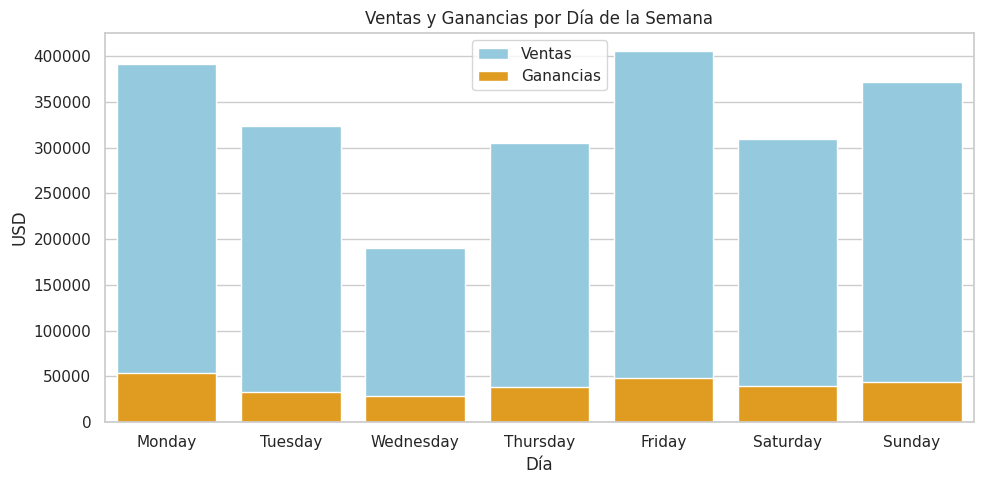

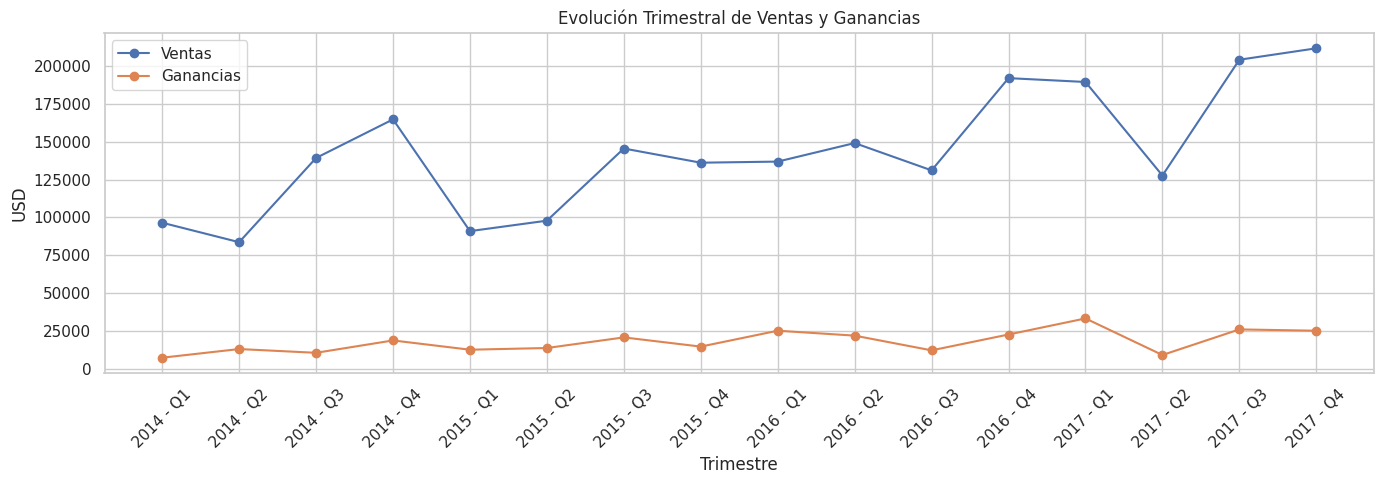

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Agrupar por día de la semana ---

ventas_dia = df_orders_time.groupby("Day Name")[["Sales", "Profit"]].sum().reset_index()

# Asegurar orden correcto (lunes a domingo)
orden_dias = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
ventas_dia["Day Name"] = pd.Categorical(ventas_dia["Day Name"], categories=orden_dias, ordered=True)
ventas_dia = ventas_dia.sort_values("Day Name")

# Gráfico por día de la semana
plt.figure(figsize=(10, 5))
sns.barplot(x="Day Name", y="Sales", data=ventas_dia, color="skyblue", label="Ventas")
sns.barplot(x="Day Name", y="Profit", data=ventas_dia, color="orange", label="Ganancias")
plt.title("Ventas y Ganancias por Día de la Semana")
plt.xlabel("Día")
plt.ylabel("USD")
plt.legend()
plt.tight_layout()
plt.show()

# --- Agrupar por trimestre ---

# Agrupar por 'Quarter & Year'
ventas_trimestre = df_orders_time.groupby("Quarter & Year")[["Sales", "Profit"]].sum().reset_index()

# Extraer año y trimestre como columnas separadas
ventas_trimestre["Year"] = ventas_trimestre["Quarter & Year"].str.extract(r"(\d{4})").astype(int)
ventas_trimestre["Quarter"] = ventas_trimestre["Quarter & Year"].str.extract(r"(Q\d)")[0]
ventas_trimestre["Quarter"] = ventas_trimestre["Quarter"].str.replace("Q", "").astype(int)

# Crear fecha ficticia para ordenar: primer mes de cada trimestre
ventas_trimestre["Fecha"] = pd.to_datetime(ventas_trimestre["Year"].astype(str) + "-" +
                                           (ventas_trimestre["Quarter"] * 3 - 2).astype(str) + "-01")

# Ordenar
ventas_trimestre = ventas_trimestre.sort_values("Fecha")

# Gráfico de evolución trimestral
plt.figure(figsize=(14, 5))
plt.plot(ventas_trimestre["Quarter & Year"], ventas_trimestre["Sales"], marker='o', label="Ventas")
plt.plot(ventas_trimestre["Quarter & Year"], ventas_trimestre["Profit"], marker='o', label="Ganancias")
plt.title("Evolución Trimestral de Ventas y Ganancias")
plt.xticks(rotation=45)
plt.ylabel("USD")
plt.xlabel("Trimestre")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Ventas y ganancias por día de la semana**

| Día                     | Insight Principal                                                                   |
| ----------------------- | ----------------------------------------------------------------------------------- |
| **Viernes**             | Es el día más fuerte en **ventas** y también con **ganancias más altas**.           |
| **Miércoles**           | El día más bajo en ventas y ganancias. Podría ser una oportunidad para promociones. |
| **Domingo** y **lunes** | También tienen buen volumen de ventas, aunque no tanto beneficio.                   |

Observación clave: Aunque hay buena actividad de ventas en la mayoría de días, la rentabilidad no siempre acompaña. Esto sugiere diferencias en el tipo de productos o clientes por día.

**Evolución Trimestral de Ventas y Ganancias:**

| Trimestre                    | Insight                                                                               |
| ---------------------------- | ------------------------------------------------------------------------------------- |
| **2017-Q4**                  | Máximo histórico de ventas y ganancias. Probable efecto de fin de año.                |
| **2016-Q4** y **2015-Q3/Q4** | También muestran picos, reforzando la estacionalidad.                                 |
| **2017-Q2**                  | Notablemente más bajo en ganancias (pudo haber promociones agresivas o devoluciones). |

Observación clave: Hay una estacionalidad fuerte en Q4 (oct-dic). Sería ideal enfocar estrategias comerciales y stock en esa ventana.


# Análisis por Segmento, Categoría y Subcategoría

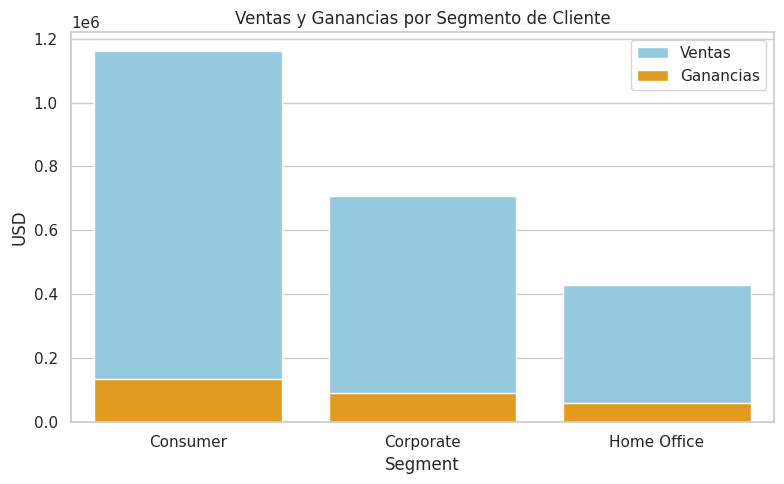

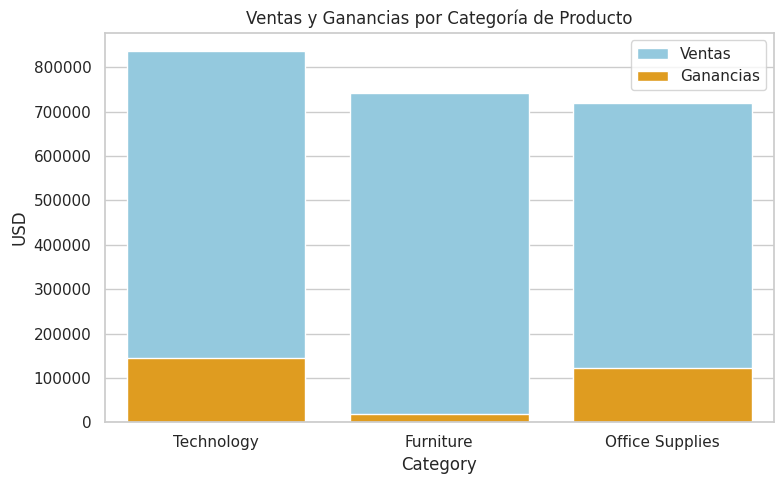

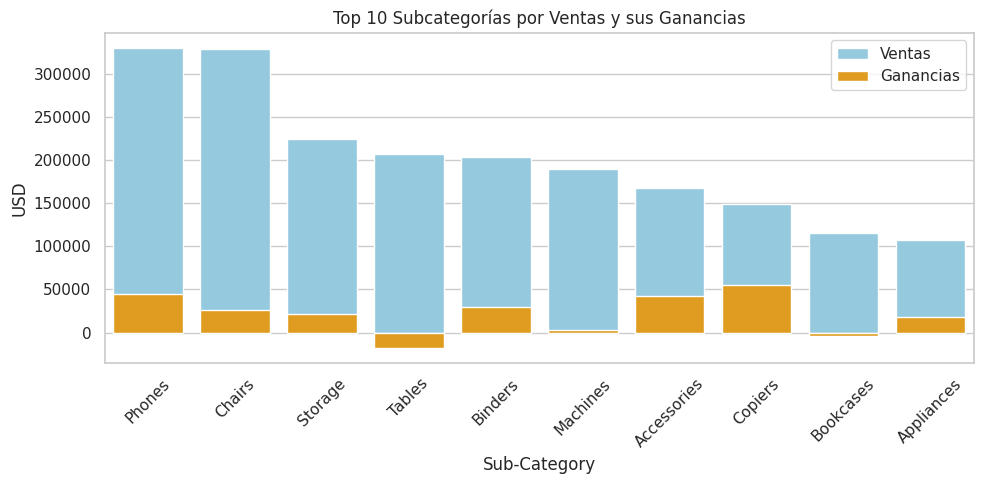

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Ventas y Ganancias por Segmento ---
segmento = df_orders.groupby("Segment")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Segment", y="Sales", data=segmento, color="skyblue", label="Ventas")
sns.barplot(x="Segment", y="Profit", data=segmento, color="orange", label="Ganancias")
plt.title("Ventas y Ganancias por Segmento de Cliente")
plt.ylabel("USD")
plt.legend()
plt.tight_layout()
plt.show()

# --- Ventas y Ganancias por Categoría ---
categoria = df_orders.groupby("Category")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Category", y="Sales", data=categoria, color="skyblue", label="Ventas")
sns.barplot(x="Category", y="Profit", data=categoria, color="orange", label="Ganancias")
plt.title("Ventas y Ganancias por Categoría de Producto")
plt.ylabel("USD")
plt.legend()
plt.tight_layout()
plt.show()

# --- Ventas y Ganancias por Subcategoría (Top 10) ---
subcat = df_orders.groupby("Sub-Category")[["Sales", "Profit"]].sum().sort_values("Sales", ascending=False).head(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x="Sub-Category", y="Sales", data=subcat, color="skyblue", label="Ventas")
sns.barplot(x="Sub-Category", y="Profit", data=subcat, color="orange", label="Ganancias")
plt.title("Top 10 Subcategorías por Ventas y sus Ganancias")
plt.ylabel("USD")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Categoría de Producto**

| Categoría           | Ventas      | Ganancia    | Observación                                  |
| ------------------- | ----------- | ----------- | -------------------------------------------- |
| **Technology**      | 🟦 Más alta | 🟧 Más alta | La categoría más rentable.                   |
| **Furniture**       | 🟦 Alta     | 🟧 Muy baja | Alto volumen con **baja ganancia**, cuidado. |
| **Office Supplies** | 🟦 Media    | 🟧 Media    | Buen equilibrio.                             |

Conclusión: Aunque Furniture vende bien, su rentabilidad es muy baja. Puede haber descuentos excesivos o productos con márgenes negativos.

**Subcategorías (Top 10 por ventas)**

| Subcategoría                       | Observación                                             |
| ---------------------------------- | ------------------------------------------------------- |
| **Phones**                         | Altas ventas y alta rentabilidad. Muy buen rendimiento. |
| **Chairs / Tables**                | Buen volumen, pero **Tables tiene pérdidas**.           |
| **Binders, Bookcases, Appliances** | Ganancias muy bajas o negativas.                        |
| **Accessories y Copiers**          | Buenas ganancias comparadas con otras.                  |

Conclusión: Algunas subcategorías como Tables y Binders están generando ventas pero no ganancias, lo cual requiere revisión de precios, costos o promociones.

**Descuento (Discount)**

Las órdenes devueltas tienen descuentos similares a las no devueltas.

*Media:*

Devuelta: 0.143

No devuelta: 0.157

Conclusión: No parece ser un predictor fuerte por sí solo.

**Segmento del cliente**

Los tres segmentos (Consumer, Corporate, Home Office) tienen devoluciones.

En proporción, Corporate y Home Office parecen tener más devoluciones relativas que Consumer.

Conclusión: Podría ser útil como variable categórica para el modelo.

**Categoría de Producto**

Las devoluciones ocurren más frecuentemente (en proporción) en:

Furniture

Office Supplies

Tecnología tiene pocas devoluciones.

Conclusión: Category es una buena variable para el modelo.

**Otras metricas:**

| Métrica  | No Devuelta | Devuelta | Observación                              |
| -------- | ----------- | -------- | ---------------------------------------- |
| Sales    | 230.23      | 225.63   | Casi igual                               |
| Profit   | 28.62       | 29.04    | Similar, pero un poco mayor en devueltas |
| Quantity | 3.79        | 3.82     | Muy parecidas                            |

**Usaremos para el clasificador:**

Numéricas:

Discount, Sales, Profit, Quantity

Categóricas:

Category, Segment, Ship Mode
